# FEED FORWARD NEURAL NETWORK CLASSIFICATION

---
A.A. 2022/23 (6 CFU) - Dr. Jacopo Pegoraro, Dr. Daniele Mari
---




In [27]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [28]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

## Data generation

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_85587/2858483818.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


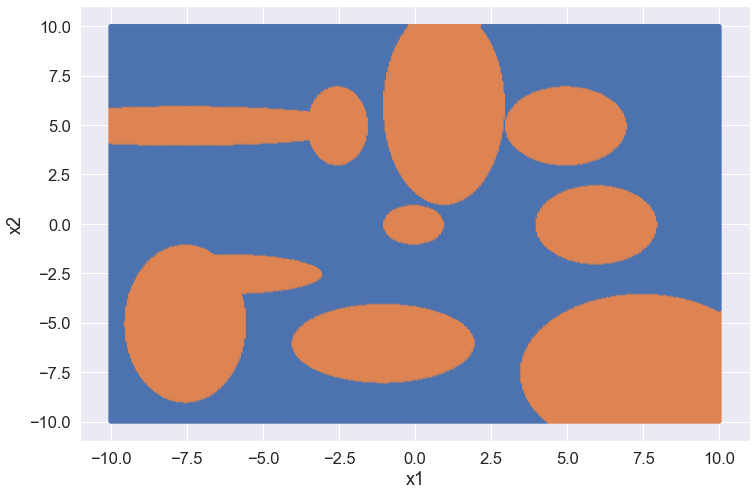

In [29]:
import itertools

np.random.seed(123)

def bidimensional_model(x1, x2):
    a = 1
    b = 1
    cx1 = 0
    cx2 = 0
    out = (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 2
    b = 2
    cx1 = 5
    cx2 = 5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 1
    b = 2
    cx1 = -2.5
    cx2 = 5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 3
    b = 1
    cx1 = -6
    cx2 = -2.5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 2
    b = 4
    cx1 = -7.5
    cx2 = -5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 6
    b = 1
    cx1 = -7.5
    cx2 = 5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 4
    b = 4
    cx1 = 7.5
    cx2 = -7.5
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 3
    b = 2
    cx1 = -1
    cx2 = -6
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 2
    b = 5
    cx1 = 1
    cx2 = 6
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    a = 2
    b = 2
    cx1 = 6
    cx2 = 0
    out |= (x1 - cx1)**2 / a**2 + (x2 - cx2)**2 / b **2 < 1
    return out.astype(int)

### PLOT MODEL
# Input grid
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
x_prod = [x for x in itertools.product(x1, x2)]
x1 = np.array([x[0] for x in x_prod])
x2 = np.array([x[1] for x in x_prod])
# Evaluate out
y = bidimensional_model(x1, x2)
# Scatter plot
fig, ax = plt.subplots(figsize=(12,8))
colors = np.array(['C0', 'C1'])
ax.scatter(x1, x2, c=colors[y], s=10, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig.show()

### Training points

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_85587/764034644.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


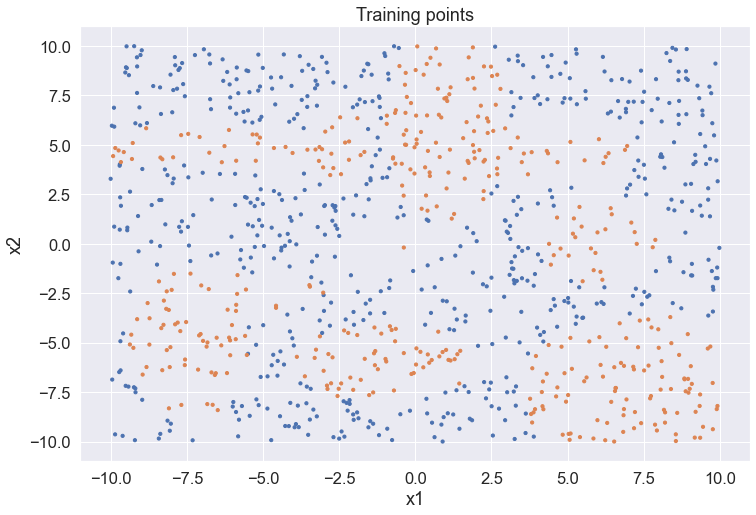

In [30]:
import pandas as pd

### Train data
num_points = 1000
x1 = np.random.uniform(-10, 10, num_points)
x2 = np.random.uniform(-10, 10, num_points)
y = bidimensional_model(x1, x2)
train_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
train_df.to_csv('classifier_train_data.csv', index=False)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, c=colors[y], s=10, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Training points')
fig.show()

### Validation points

In this case: we generate validation points.
Usually: validation points are randomly selected from the training points (~20% of training data).

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_85587/286216996.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


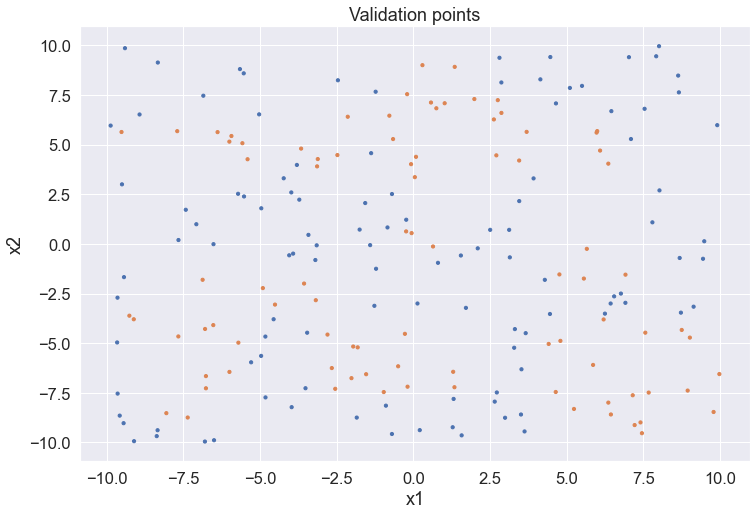

In [31]:
### Validation data
num_points = 200
x1 = np.random.uniform(-10, 10, num_points)
x2 = np.random.uniform(-10, 10, num_points)
y = bidimensional_model(x1, x2)
val_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
val_df.to_csv('classifier_val_data.csv', index=False)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, c=colors[y], s=10, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Validation points')
fig.show()

### Test points

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_85587/2542151212.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


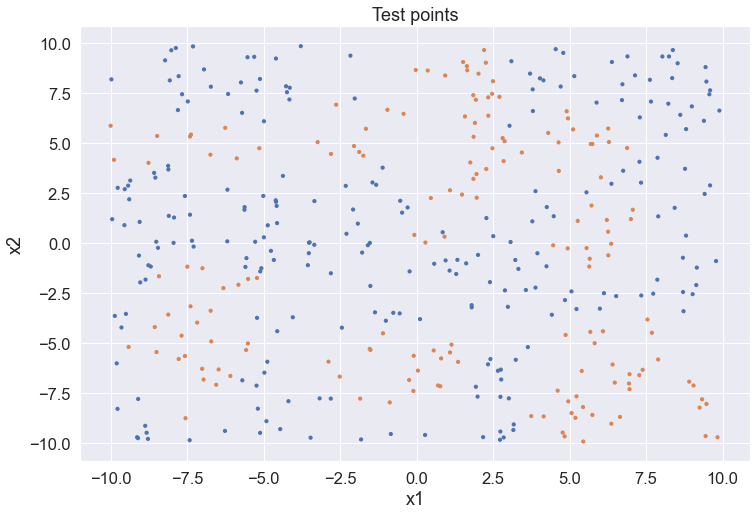

In [32]:
### Test data
num_points = 400
x1 = np.random.uniform(-10, 10, num_points)
x2 = np.random.uniform(-10, 10, num_points)
y = bidimensional_model(x1, x2)
val_df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
val_df.to_csv('classifier_test_data.csv', index=False)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, c=colors[y], s=10, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Test points')
fig.show()

## Dataset and Dataloader

Define the dataset

In [33]:
class ClassifierDataset(Dataset):

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        ###############################
        self.transform = transform
        # Read the file and store the content in a pandas DataFrame
        self.df = pd.read_csv(csv_file)
        ###############################

    def __len__(self):
        ###############################
        # The length of the dataset is simply the length of the self.data list
        return self.df.shape[0]
        ###############################

    def __getitem__(self, idx):
        # Our sample is the row at index idx of the dataframe

        ###############################
        row = self.df.iloc[idx]
        # There are 2 inputs this time
        sample = ([row.x1, row.x2], row.y)
        if self.transform:
            sample = self.transform(sample)
        ###############################
        return sample

Define the transformations

In [34]:
class ToTensor(object):
    """Convert sample to Tensors."""

    def __call__(self, sample):
        x, y = sample
        return (torch.Tensor(x).float(),
                torch.Tensor([y]).float())

Initialize the datasets

In [35]:
###############################
composed_transform = transforms.Compose([ToTensor()])

train_dataset = ClassifierDataset(csv_file='classifier_train_data.csv',
                                    transform=composed_transform)
val_dataset   = ClassifierDataset(csv_file='classifier_val_data.csv',
                                    transform=composed_transform)
test_dataset  = ClassifierDataset(csv_file='classifier_test_data.csv',
                                    transform=composed_transform)
###############################

Define the dataloaders

In [36]:
###############################
 #batch size = 200
train_dataloader = DataLoader ( train_dataset, batch_size = 200, shuffle = True )
#The batch size can be equal to the validation set size if it fits in memory
val_dataloader   = DataLoader ( val_dataset, batch_size = 200, shuffle = False ) 
test_dataloader  =  DataLoader ( test_dataset, batch_size = 200, shuffle = False )
###############################

## Network definition

In [37]:
class ClassifierNet(nn.Module):
    def __init__(self, Ni, Nh1, Nh2, No):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.act = nn.Sigmoid()
        
    def forward(self, x, additional_out=False):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.out(x)
        return x

class Classifier ():

    def __init__(self, Ni, Nh1, Nh2, No, device):
        torch.manual_seed(0)
        self.device = device

        self.Net = ClassifierNet(Ni, Nh1, Nh2, No)
        self.Net.to(device)

    def train(self, train_dataloader, val_dataloader, loss_fn, epochs):
        self.optimizer =  optim.Adam(self.Net.parameters(), lr=1e-3)

        self.loss_fn = loss_fn

        self.train_loss_log = []
        self.val_loss_log = []

        for epoch_num in range(epochs):
            if epoch_num % 200 == 0:
                print('*'*50)
                print(f'EPOCH {epoch_num}')

            ### TRAIN
            train_loss= []
            self.Net.train() # Training mode (e.g. enable dropout, batchnorm updates,...)
            for sample_batched in train_dataloader:
                # Move data to device
                x_batch = sample_batched[0].to(self.device)
                label_batch = sample_batched[1].to(self.device)

                ###########################################
                out = self.Net(x_batch)

                # Compute loss
                loss = self.loss_fn(out, label_batch)

                # Backpropagation
                self.optimizer.zero_grad()
                loss.backward()

                # Update the weights
                self.optimizer.step()
                ###########################################

                # Save train loss for this batch
                loss_batch = loss.detach().cpu().numpy()
                train_loss.append(loss_batch)
        
            # Save average train loss
            train_loss = np.mean(train_loss)
            if epoch_num % 100 == 0:
                print(f"AVERAGE TRAIN LOSS: {train_loss}")
            self.train_loss_log.append(train_loss)

            ### VALIDATION
            val_loss= []
            self.Net.eval() # Evaluation mode (e.g. disable dropout, batchnorm,...)

            with torch.no_grad(): # Disable gradient tracking
                for sample_batched in val_dataloader:
                    # Move data to device
                    x_batch = sample_batched[0].to(self.device)
                    label_batch = sample_batched[1].to(self.device)

                    # Forward pass
                    out = self.Net(x_batch)

                    # Compute loss
                    loss = self.loss_fn(out, label_batch)

                    # Save val loss for this batch
                    loss_batch = loss.detach().cpu().numpy()
                    val_loss.append(loss_batch)


                # Save average validation loss
                val_loss = np.mean(val_loss)
                if epoch_num % 200 == 0:
                    print(f"AVERAGE VALIDATION LOSS: {val_loss}")
                self.val_loss_log.append(val_loss)

    def history(self):
        return self.train_loss_log, self.val_loss_log
    
    def plot_history(self, save_dir='.'):
        import seaborn as sns
        sns.set_theme (style="darkgrid", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 10})
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_log, label='train')
        plt.plot(self.val_loss_log, label='val')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        plt.savefig(os.path.join(save_dir, 'loss.png'), dpi=300, bbox_inches='tight')
    
    def predict(self, x, numpy=False):
        # Network output
        # eval() acts as switch for some specific layers/parts of the model that behave
        # differently during training and inference (eval) time. For example, Dropout 
        # BatchNorm etc.  
        self.Net.eval()
        with torch.no_grad(): # turn off gradients computation
            out = self.Net(x)
        print(f"Output shape: {out.shape}")
        if numpy:
            out = out.detach().cpu().numpy()
        else:
            return out
        
    def get_weights(self, numpy=True):
        dict_weights = {}
        names = self.Net.state_dict().keys()
        print (names)
        if not numpy:
            for name in names:
                dict_weights[name] = self.Net.state_dict()[name]
        else:
            for name in names:
                dict_weights[name] = self.Net.state_dict()[name].detach().cpu().numpy()

        return dict_weights

    def save_state_dict(self, path):
        if path.split('.')[-1] != 'torch':
            path = path + '.torch'
        ### Save network parameters
        ### Save the network state
        # The state dictionary includes all the parameters of the network
        net_state_dict = self.Net.state_dict()
        print(net_state_dict.keys())
        # Save the state dict to a file
        torch.save(net_state_dict, path)

    def load_state_dict(self, path):
        if path.split('.')[-1] != 'torch':
            path = path + '.torch'
        
        # check if path exists
        if not os.path.exists(path):
            raise ValueError(f"Path {path} does not exist")

        ### Reload the network state
        # First initialize the network (if not already done)
        # Load the state dict previously saved
        net_state_dict = torch.load(path)
        # Update the network parameters
        self.Net.load_state_dict(net_state_dict)

    def save_optimizer_state(self, path):

        if path.split('.')[-1] != 'torch':
            path = path + '.torch'

        ### Save the self.optimizer state
        torch.save(self.optimizer.state_dict(), path)

    def load_optimizer_state(self, path):
        if path.split('.')[-1] != 'torch':
            path = path + '.torch'
        if not os.path.exists(path):
            raise ValueError(f"Path {path} does not exist")

        ### Reload the optimizer state
        opt_state_dict = torch.load(path)
        self.optimizer.load_state_dict(opt_state_dict)

    def _accuracy (self,all_outputs, all_labels):

        all_output_classes = torch.zeros(all_outputs.shape).to(self.device)
        all_output_classes[all_outputs > 0] = 1 # output greater than 0 is class 1
        tot_correct_out = (all_output_classes == all_labels).sum()
        test_accuracy =  tot_correct_out / len(all_labels)
        print(f"TEST ACCURACY: {test_accuracy:.2f}%")

        return test_accuracy

    
    def test (self, test_dataloader, device, plot=True):
        all_inputs = []
        all_outputs = []
        all_labels = []
        self.Net.eval() # Evaluation mode (e.g. disable dropout)
        with torch.no_grad(): # Disable gradient tracking
            for sample_batched in test_dataloader:
                # Move data to device
                x_batch = sample_batched[0].to(device)
                label_batch = sample_batched[1].to(device)
                # Forward pass
                out = self.Net(x_batch)
                # Save outputs and labels
                all_inputs.append(x_batch)
                all_outputs.append(out)
                all_labels.append(label_batch)
        # Concatenate all the outputs and labels in a single tensor
        all_inputs  = torch.cat(all_inputs)
        all_outputs = torch.cat(all_outputs)
        all_labels  = torch.cat(all_labels)

        test_loss = self.loss_fn(all_outputs, all_labels)
        test_acc = self._accuracy(all_outputs, all_labels)
        print(f"AVERAGE TEST LOSS: {test_loss}")


        if plot:
            ### Plot
            import seaborn as sns
            sns.set_theme (style="darkgrid", font_scale=1.5, rc={"lines.linewidth": 2.5, "lines.markersize": 10})
            x1 = all_inputs.squeeze().cpu().numpy()[:, 0]
            x2 = all_inputs.squeeze().cpu().numpy()[:, 1]
            y_true = all_labels.squeeze().cpu().numpy()
            all_output_classes = torch.zeros(all_outputs.shape).to(device)
            y_pred = all_output_classes.squeeze().cpu().numpy()

            fig, ax = plt.subplots(figsize=(12,8))
            # Plot predictions
            ax.scatter(x1, x2, c=colors[y_pred.astype(np.uint8)], s=10, marker='o')
            ax.set_xlabel('x1')
            ax.set_ylabel('x2')
            ax.set_title('Network Predictions')
            # Mark wrong outputs
            error_mask = y_pred != y_true
            ax.scatter(x1[error_mask], x2[error_mask], color='red', s=100, marker='x', label='MISCLASSIFIED SAMPLES')
            plt.legend()
            fig.show()

        return test_loss, test_acc

## Training loop

In [38]:
# Initialize the network
torch.manual_seed(0)
Ni = 2
Nh1 = 128
Nh2 = 256
No = 1 #now we have classification between two classes
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

modelClassification = Classifier(Ni, Nh1, Nh2, No, DEVICE)

# Define the loss function
###############################################
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer with lr=1e-2
modelClassification.train(train_dataloader, val_dataloader, loss_fn, epochs=00)

Network initialized


In [39]:
# Define the optimizer with lr=1e-2
modelClassification.train(train_dataloader, val_dataloader, loss_fn, epochs=800)

**************************************************
EPOCH 0
AVERAGE TRAIN LOSS: 0.6755272746086121
AVERAGE VALIDATION LOSS: 0.6997036933898926
AVERAGE TRAIN LOSS: 0.5356370806694031
**************************************************
EPOCH 200
AVERAGE TRAIN LOSS: 0.4076411724090576
AVERAGE VALIDATION LOSS: 0.5264606475830078
AVERAGE TRAIN LOSS: 0.34504562616348267
**************************************************
EPOCH 400
AVERAGE TRAIN LOSS: 0.31055015325546265
AVERAGE VALIDATION LOSS: 0.4536973834037781
AVERAGE TRAIN LOSS: 0.2740287780761719
**************************************************
EPOCH 600
AVERAGE TRAIN LOSS: 0.24869206547737122
AVERAGE VALIDATION LOSS: 0.39345431327819824
AVERAGE TRAIN LOSS: 0.23276548087596893


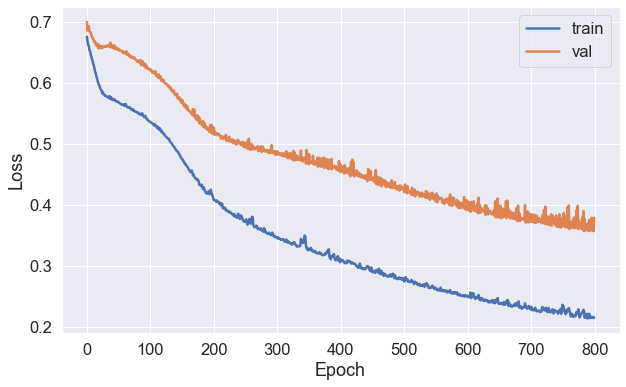

<Figure size 432x288 with 0 Axes>

In [42]:
modelClassification.plot_history()

## Final test

Iterate the dataloader a single time and save all the outputs (in case you have multiple batches)

TEST ACCURACY: 0.87%
AVERAGE TEST LOSS: 0.27020686864852905


/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_85587/850369435.py:247: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


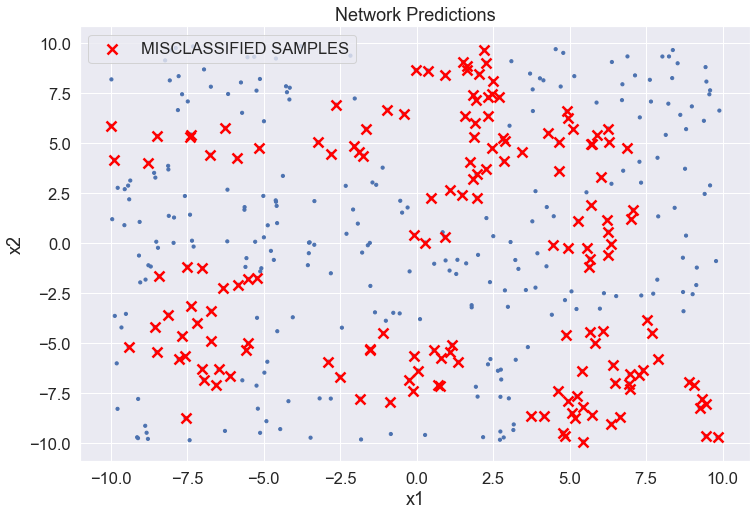

In [43]:
test_loss, test_acc = modelClassification.test(test_dataloader, DEVICE)

In this case the network has a linear output (for a better stability of the loss function). 
To have probability estimates you can apply a sigmoid to the network output.

Since we just need the most probable class and we have a single output, we can consider the sign of the linear output. Negative output means that the class 0 is the most probable (probability < 50%), otherwise class 1 (probability > 50%).

Essentially this network estimates the probability of the input sample to be of class 1.

> **NOTE**
> 
> You can (and should, for practice) redefine the problem by defining a network with more than one output, each of them corresponding to a specific class (2 in this case). Since the two classes are mutually exclusive, the loss function should be a CrossEntropyLoss (softmax activation). In a multi-class scenario, a BCE loss is suitable when the classes are NOT mutually exclusive.


